In [23]:
%reset
%load_ext autoreload
%autoreload 2

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [24]:
%matplotlib inline

In [25]:
%qtconsole

# Legendre Polynomials in Surface Analysis

In [73]:
import matplotlib.pyplot as plt
import numpy as np
import os
from dataIO.span import span
from dataIO.fn_add_subfix import fn_add_subfix

from skimage import data as skidata
from skimage import img_as_float

from astropy.io import fits

from IPython.display import display
from plotting.backends import maximize
from pySurf.data2D_class import Data2D

In [27]:
pwd

'g:\\My Drive\\progetti\\POOL\\PSD'

Investigation of Legendre polynomials.
They apply on rectangular apertures, same way as Fourier can apply to circular closed profiles, and Zernike to round apertures.

Reproduce case of Peng et al.

In [28]:
from pySurf.data2D import plot_data

In [29]:
# routines for profiles are contained in library `pyProfile.profile`
from pyProfile import profile as prof
from pyProfile.profile import make_signal 
from pyProfile.psd import plot_sig_psd,psd 

In [30]:
from utilities.imaging.fitting import legendre2d,RAlegendre2d
from astropy.modeling import models,fitting

In [31]:
def test_coeff(xo=2,yo=2,xl=None,yl=None):

    if xl is not None and yl is not None:
        xo,yo = max(xl),max(yl)
        p_init = models.Legendre2D(xo,yo)
        #Set all variables to fixed
        for l in range(xo+1):
            for m in range(yo+1):
                key = 'c'+str(l)+'_'+str(m)
                p_init.fixed[key] = True
        #p_init.fixed = dict.fromkeys(p_init.fixed.iterkeys(),True)
        #Allow specific orders to vary
        for i in range(len(xl)):
            key = 'c'+str(xl[i])+'_'+str(yl[i])
            p_init.fixed[key] = False
    else:
        p_init = models.Legendre2D(xo,yo)
        
    return p_init


p_init = test_coeff(2,1)
print (p_init.param_names)
print (p_init.fixed)
p_init = test_coeff(1,1)
print (p_init.param_names)
print (p_init.fixed)
p_init = test_coeff(2,2)
print (p_init.param_names)
print (p_init.fixed)

('c0_0', 'c1_0', 'c2_0', 'c0_1', 'c1_1', 'c2_1')
{'c0_0': False, 'c1_0': False, 'c2_0': False, 'c0_1': False, 'c1_1': False, 'c2_1': False}
('c0_0', 'c1_0', 'c0_1', 'c1_1')
{'c0_0': False, 'c1_0': False, 'c0_1': False, 'c1_1': False}
('c0_0', 'c1_0', 'c2_0', 'c0_1', 'c1_1', 'c2_1', 'c0_2', 'c1_2', 'c2_2')
{'c0_0': False, 'c1_0': False, 'c2_0': False, 'c0_1': False, 'c1_1': False, 'c2_1': False, 'c0_2': False, 'c1_2': False, 'c2_2': False}


In [71]:
deg = 3

#for n in np.arange(deg+2):
#    for i in np.arange(n):
#        print (n-1-i,i)
        
indices = [(n-1-i,i) for n in np.arange(deg+2) for i in np.arange(n)]
indices   

[(0, 0),
 (1, 0),
 (0, 1),
 (2, 0),
 (1, 1),
 (0, 2),
 (3, 0),
 (2, 1),
 (1, 2),
 (0, 3)]

In [102]:
coeff = [[0,0],[0,1]]

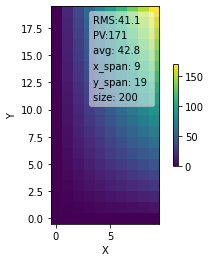

In [103]:
from numpy.polynomial.legendre import leggrid2d

x=np.arange(10)
y=np.arange(20)

data=leggrid2d(x,y,coeff)

plot_data(data.T,x,y,stats=2)
#d1 = Data2D(data,x,y)

# Use astropy models

In [106]:
xo,yo=np.shape(coeff)

In [133]:
p_init = models.Legendre2D(xo-1,yo-1,x_domain=None,y_domain=None,
                           x_window=[0,9],y_window=[0,19.]) #,x_domain=x_domain,y_domain=y_domain,*args,**kwargs)
'''
if xl is not None and yl is not None or indices is not None: #has some fixed coefficients
    #pdb.set_trace()
    # First set all coefficients in .fixed to True.  
    for k in p_init.fixed.keys() : p_init.fixed[k]=True
    #The ones in xl,yl are set to False, so they are taken as independent variables.
    if indices is not None:
        ## Handle xl,yl
        ## set which variables are varied in fit
        assert (xl is None and yl is None)
        kl = [p_init.param_names[i] for i in indices]
    else:
        kl = make_legendre_keys(xl,yl)
    for k in kl:
        p_init.fixed[k] = False
'''

for k in p_init.fixed.keys() : p_init.fixed[k]=False
fit_p = fitting.LinearLSQFitter()  #Define fitting algorithm
    
xm,ym = np.meshgrid(x,y)

p = fit_p(p_init,xm,ym,data)

In [134]:
p_init.parameters
print(p)

Model: Legendre2D
Inputs: ('x', 'y')
Outputs: ('z',)
Model set size: 1
X-Degree: 1
Y-Degree: 1
Parameters:
            c0_0                c1_0                c0_1                c1_1       
    ------------------- -------------------- ------------------ -------------------
    -4.2857142857143415 -0.21428571428569393 2.8195488721804494 0.49624060150375954


In [11]:
fn = r'G:\My Drive\progetti\ion_beam\specchio_beatrix\data\input_data\PARABOLA\RUN24\MFT Run24\Run24_MFT10X_phimax_3.txt'

In [12]:
from pySurf.data2D_class import Data2D 
from pySurf.readers.instrumentReader import matrix4D_reader

d=Data2D(fn,center=(0,0),reader=matrix4D_reader,scale=(1000.,1000.,1),units=['mm','mm','nm'])

first argument is string, use it as filename


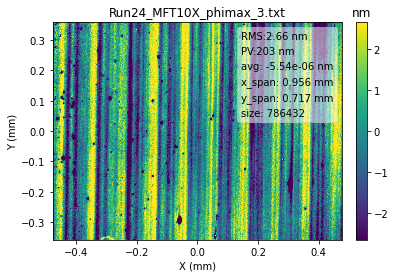

In [13]:
d.plot()